In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/data_science_job.csv')

In [5]:
df.head()
# the dataset is about data science jobs

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


Here Target represents candidate is hired or not.
1 - hired
0 - not hired

In [6]:
# to find the missing data column wise (in %)

df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

here, we can apply CCA only on those columns whose missing data is less than 5%, for eg: city_development_index, enrolled_university etc.

In [7]:
df.shape

(19158, 13)

In [9]:
# to find columns on which we can apply CCA

cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]

cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [10]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
13803,0.624,Full time course,Graduate,9.0,33.0
14862,0.920,no_enrollment,Primary School,13.0,26.0
16235,0.920,no_enrollment,Graduate,7.0,90.0
18931,0.920,no_enrollment,High School,6.0,85.0
6657,0.624,no_enrollment,Graduate,9.0,9.0


In [11]:
# the below step will help us find ki in saare rows ka data hatane ke baad kitna data humare pass bachega

len(df[cols].dropna()) / len(df)

0.8968577095730244

**we'll be left with 89% of the total data**

In [12]:
# removing missing/ null values using dropna() function

new_df = df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

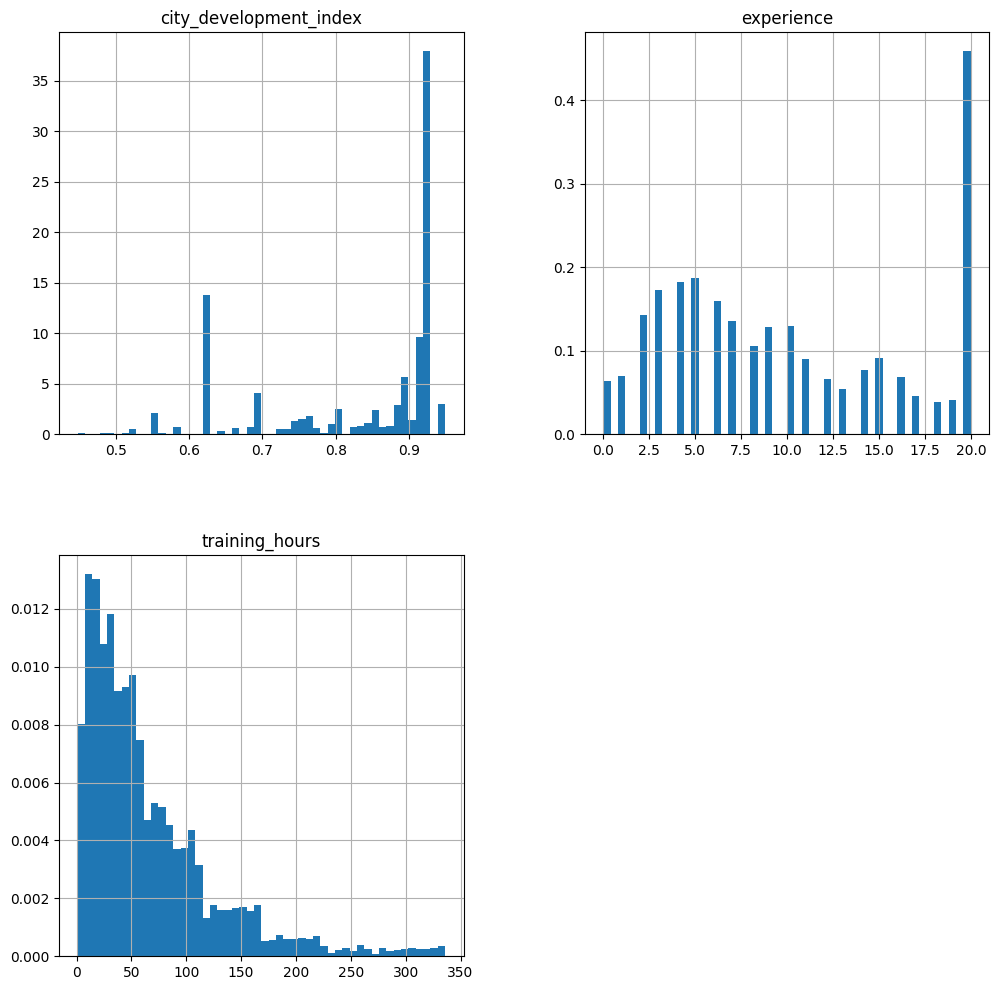

In [13]:
new_df.hist(bins = 50, density = True, figsize = (12, 12))
plt.show()

**jab bhi kisi numeric column pr CCA lagate ho toh always plot a histogram and compare the data distribution before CCA and after CCA.keep in mind that both the distributions should be almost similar**

<Axes: >

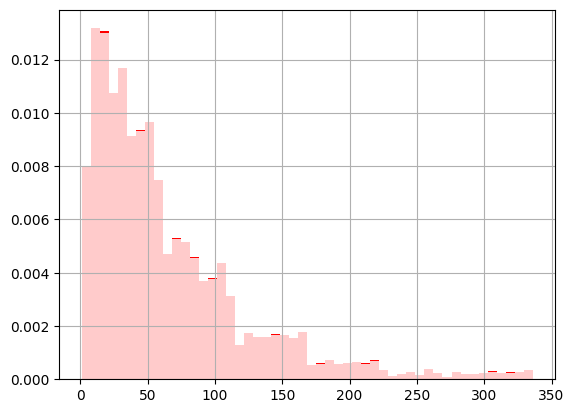

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density = True, color ='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distribution

new_df['training_hours'].hist(bins=50, ax=ax, color ='white', density = True, alpha = 0.8)

**We can see from the above graph that the distribution is almost same!**

<Axes: ylabel='Density'>

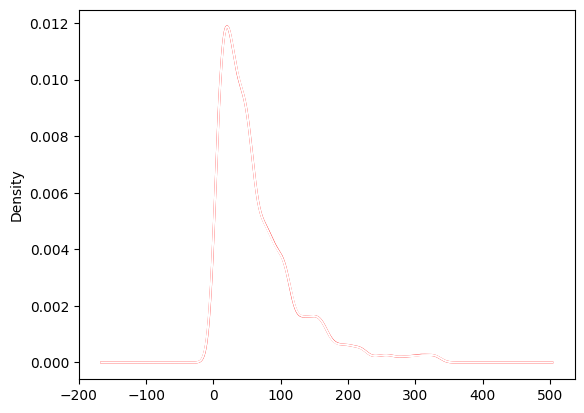

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].plot.density(color ='red')

# data after cca
new_df['training_hours'].plot.density( color ='white')

**This plot tells us that the missing data was completely at random.**

<Axes: >

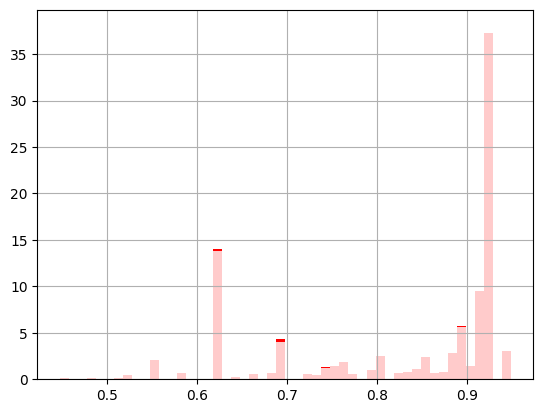

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density = True, color ='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distribution

new_df['city_development_index'].hist(bins=50, ax=ax, color ='white', density = True, alpha = 0.8)

<Axes: ylabel='Density'>

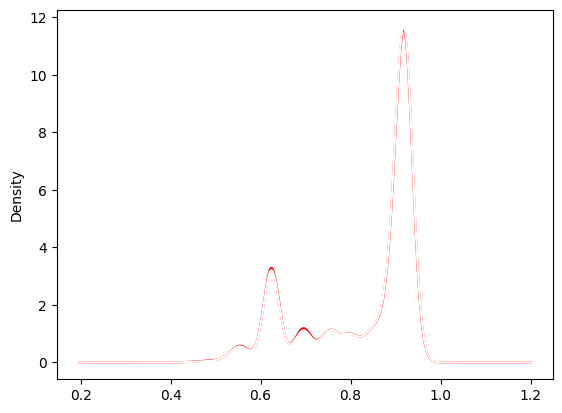

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].plot.density(color ='red')

# data after cca
new_df['city_development_index'].plot.density( color ='white')

<Axes: >

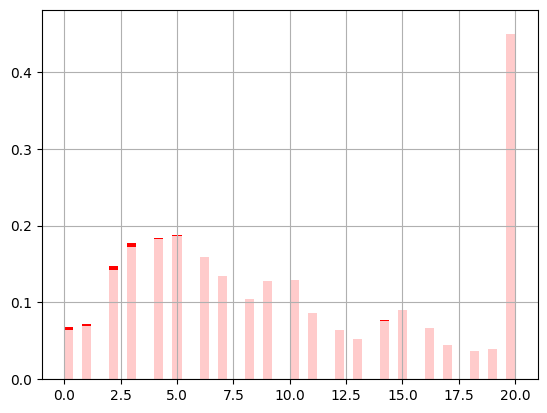

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density = True, color ='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distribution

new_df['experience'].hist(bins=50, ax=ax, color ='white', density = True, alpha = 0.8)

<Axes: ylabel='Density'>

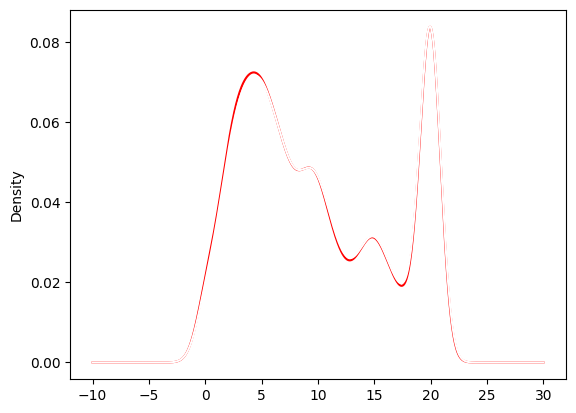

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].plot.density(color ='red')

# data after cca
new_df['experience'].plot.density( color ='white')

these above visuals tells us that data was missing at random and it waas safe to perform CCA on them.

In [25]:
# now we'll deal with the categorical column

temp = pd.concat([
    # percentage of observations per category, original data
    df['enrolled_university'].value_counts() / len(df),

    # percentage of observations per category, cca data
    new_df['enrolled_university'].value_counts() / len(new_df)
],
axis =1)

# add columns names
temp.columns = ['original' ,'after cca']

temp

,original,after cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


**When performing CCA on categorical columns, we should keep in mind that the ratio of different categories should be kept the same before and after CCA**

In [26]:
temp = pd.concat([
    # percentage of observations per category, original data
    df['education_level'].value_counts() / len(df),

    # percentage of observations per category, cca data
    new_df['education_level'].value_counts() / len(new_df)
],
axis =1)

# add columns names
temp.columns = ['original' ,' after cca']

temp

,original,after cca
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


# Comparing ratios before and after CCA (for categorical columns)